
# Import Necessary Libraries


# Import libraries

In [1]:
import os 
print("hi")

hi


In [5]:
pip install seaborn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 KB 454.8 kB/s eta 0:00:00a 0:00:01
You should consider upgrading via the '/home/hifis/hifis0010/thesis/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [6]:
'''
!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu118
!pip install pandas matplotlib pillow torch torchvision scikit-learn tqdm seaborn
'''

'\n!pip install torch torchvision torchaudio --extra-index-url https://download.pytorch.org/whl/cu118\n!pip install pandas matplotlib pillow torch torchvision scikit-learn tqdm seaborn\n'

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import torch.nn.functional as F
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms
#from natsort import natsorted # type: ignore
from sklearn.model_selection import GroupShuffleSplit
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from torch.utils.data import DataLoader, WeightedRandomSampler
from torch.utils.data import WeightedRandomSampler
import seaborn as sns
import torch.optim as optim
import torch.nn.functional as F
import torchvision.models as models
import time
import numpy as np
from tqdm import tqdm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score, roc_auc_score
from sklearn.metrics import precision_score as skl_precision_score
from sklearn.metrics import recall_score as skl_recall_score
from sklearn.metrics import f1_score as skl_f1_score
from sklearn.metrics import accuracy_score as skl_accuracy_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
import random
import warnings
import shutil



# Import the code from all .py files

from custom_dataset import CustomMelanomaDataset  # Import the custom dataset
from resnet_model import ResNetModel
from preprocessing_csv import PreprocessingCSV
from train_test_loop import train_and_test
from lesion_predictions import LesionPredictions
from FocalLoss import FocalLoss
#from malignant_augmentation import TrainMalignantAugmentor, TestMalignantAugmentor


In [8]:
warnings.filterwarnings("ignore")


In [9]:
# Define the dynamic root path
BASE_DIR = "/home/hifis/hifis0010"

# Create the full path to the CSV file
csv_path = os.path.join(BASE_DIR, 'Thesis_Hafeez/Dataset/Train_JPEG/ISIC_2020_Training_GroundTruth.csv')

# Load the CSV file
df = pd.read_csv(csv_path)

# Display the first few rows of the dataset
print(df.head())

# Display the structure of the dataset
print(df.info())


     image_name  patient_id     sex  age_approx anatom_site_general_challenge  \
0  ISIC_2637011  IP_7279968    male        45.0                     head/neck   
1  ISIC_0015719  IP_3075186  female        45.0               upper extremity   
2  ISIC_0052212  IP_2842074  female        50.0               lower extremity   
3  ISIC_0068279  IP_6890425  female        45.0                     head/neck   
4  ISIC_0074268  IP_8723313  female        55.0               upper extremity   

  diagnosis benign_malignant  target  
0   unknown           benign     0.0  
1   unknown           benign     0.0  
2     nevus           benign     0.0  
3   unknown           benign     0.0  
4   unknown           benign     0.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33126 entries, 0 to 33125
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   image_name                     33126 non-null 

In [10]:
# Define the dynamic root path
BASE_DIR = "/home/hifis/hifis0010"

# Step 1: Define the universal path handling logic
SPLIT_CSV_DIR = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv')

# Universal Path Setup for Images
IMAGE_DIR = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'Train_JPEG', 'JPEG')

# Paths for Train/Test CSVs
TRAIN_CSV_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'train_split.csv')
TEST_CSV_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'test_split.csv')

# Create the full path to the CSV file
CSV_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez/Dataset/Train_JPEG/ISIC_2020_Training_GroundTruth.csv')
preprocess_CSV_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez/Dataset/Train_JPEG/ISIC_2020_Training_GroundTruth_preprocess.csv')

# to overcome class imbalance
TRAIN_CSV_PASS1 = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'train_pass1.csv')
TRAIN_CSV_PASS2 = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'train_pass2.csv')

# save model after training/testing
MODEL_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez',  'Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results', 'output')

In [7]:
'''
# Step : Create an instance of PreprocessingCSV
preprocessor = PreprocessingCSV(csv_path, BASE_DIR)

# Step : Execute the preprocessing steps
preprocessor.analyze_raw_data()
preprocessor.check_for_anomalies()
preprocessor.clean_data()
preprocessor.save_clean_data()
preprocessor.split_by_patient_id()
preprocessor.verify_preprocessed_data()
'''


 
 Unique values in 'anatom_site_general_challenge': ['head/neck' 'upper extremity' 'lower extremity' 'torso' 'nan'
 'lower extremityi wrote to him' 'palms/soles' 'oral/genital']

 
 Rows with variations of 'unknown':
 Empty DataFrame
Columns: [image_name, patient_id, sex, age_approx, anatom_site_general_challenge, diagnosis, benign_malignant, target]
Index: []

 
 Unique values in 'anatom_site_general_challenge' after cleanup: ['head/neck' 'upper extremity' 'lower extremity' 'torso' 'unknown'
 'palms/soles' 'oral/genital']

 
 NaN values in each column:
 image_name                        0
patient_id                        0
sex                              65
age_approx                       68
anatom_site_general_challenge     0
diagnosis                         0
benign_malignant                  0
target                            1
dtype: int64


 Infinity values in each column:
 image_name                       0
patient_id                       0
sex                           

# Ratio of dataset. Analysis of Benign/Malignant in dataset

In [11]:
def count_targets(csv_path):
    df = pd.read_csv(csv_path)
    benign_count = df[df['target'] == 0].shape[0]
    malignant_count = df[df['target'] == 1].shape[0]
    return benign_count, malignant_count

# Count targets in the training dataset
train_benign_count, train_malignant_count = count_targets(TRAIN_CSV_PATH)
print(f"Targets in training dataset:\nBenign (0.0): {train_benign_count}\nMalignant (1.0): {train_malignant_count}")

# Count targets in the test dataset
test_benign_count, test_malignant_count = count_targets(TEST_CSV_PATH)
print(f"\nTargets in test dataset:\nBenign (0.0): {test_benign_count}\nMalignant (1.0): {test_malignant_count}")

Targets in training dataset:
Benign (0.0): 23861
Malignant (1.0): 7024

Targets in test dataset:
Benign (0.0): 8094
Malignant (1.0): 1496


# Creating offline Augmentations for traing and test dataset to overcome class imbalance



# Ratio after Augmemntation of target Benign/Malignants in dataset

Here must run malignant_augmentation.py seperately.or run once here after all its purpose is served so never run


In [12]:
print(TRAIN_CSV_PATH)
print(IMAGE_DIR)
print(TEST_CSV_PATH)

/home/hifis/hifis0010/Thesis_Hafeez/Dataset/split_csv/train_split.csv
/home/hifis/hifis0010/Thesis_Hafeez/Dataset/Train_JPEG/JPEG
/home/hifis/hifis0010/Thesis_Hafeez/Dataset/split_csv/test_split.csv


In [11]:
'''
# Initialize the augmentor for training data
train_augmentor = TrainMalignantAugmentor(
        train_aug_csv=TRAIN_CSV_PATH,
        image_dir=IMAGE_DIR)

# Perform augmentation and save the updated metadata for training
train_augmentor.perform_augmentation()
train_augmentor.save_updated_metadata()
'''

Performing Image Augmentation: 100%|██████████| 24300/24300 [1:35:41<00:00,  4.23image/s]  


Image augmentations for training dataset is complete.
Updated metadata saved to /home/hifis/hifis0010/Thesis_Hafeez/Dataset/split_csv/train_split.csv
Process finished successfully.


Performing Image Augmentation (Test):   1%|          | 48/8230 [00:02<08:02, 16.96image/s]

KeyboardInterrupt



In [10]:
'''
# Initialize the augmentor for test data
test_augmentor = TestMalignantAugmentor(
        test_aug_csv=TEST_CSV_PATH,
        image_dir=IMAGE_DIR)

# Perform augmentation and save the updated metadata for testing
test_augmentor.perform_augmentation()
test_augmentor.save_updated_metadata()
'''

Performing Image Augmentation (Test): 100%|██████████| 8230/8230 [20:44<00:00,  6.61image/s]

Image augmentations for test dataset is complete.
Updated metadata saved to /home/hifis/hifis0010/Thesis_Hafeez/Dataset/split_csv/test_split.csv
Process finished successfully.


# Ratio after Augmemntation of target Benign/Malignants in dataset

In [13]:
TRAIN_CSV_PASS1 = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'train_pass1.csv')
TRAIN_CSV_PASS2 = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'train_pass2.csv')

In [10]:
'''
def count_targets(csv_path):
    df = pd.read_csv(csv_path)
    benign_count = df[df['target'] == 0].shape[0]
    malignant_count = df[df['target'] == 1].shape[0]
    return benign_count, malignant_count

# Count targets in the training dataset
train_benign_count, train_malignant_count = count_targets(TRAIN_CSV_PATH)
print(f"Targets in training dataset:\nBenign (0.0): {train_benign_count}\nMalignant (1.0): {train_malignant_count}")

# Count targets in the test dataset
test_benign_count, test_malignant_count = count_targets(TEST_CSV_PATH)
print(f"\nTargets in test dataset:\nBenign (0.0): {test_benign_count}\nMalignant (1.0): {test_malignant_count}")
'''

Targets in training dataset:
Benign (0.0): 23861
Malignant (1.0): 7024

Targets in test dataset:
Benign (0.0): 8094
Malignant (1.0): 1496


# 24k benign trained in 2 stages, 2 * (12k benign + 7K malignant) 

# Split the Benign into 2 phase trainnig.

In [13]:
'''
import random
import os
import pandas as pd

# Load the dataset
data = pd.read_csv(TRAIN_CSV_PATH)

# Verify the labels in the dataset
print("Unique values in 'benign_malignant' column:", data['benign_malignant'].unique())

# Group by patient_id
grouped = data.groupby('patient_id')

# Separate benign and malignant cases
benign_data = data[data['benign_malignant'] == 'benign']
malignant_data = data[data['benign_malignant'] == 'malignant']

# Check the number of benign and malignant samples before proceeding
print(f"Total benign cases: {len(benign_data)}")
print(f"Total malignant cases: {len(malignant_data)}")

if len(malignant_data) < 7024:
    print("Warning: Malignant data count is less than expected. Please check the data source or filtering logic.")

# Shuffle benign patient groups and split approximately in half
benign_patient_ids = list(benign_data['patient_id'].unique())
random.shuffle(benign_patient_ids)
split_index = len(benign_patient_ids) // 2

# Split benign data into two halves based on patient IDs
benign_pass1 = benign_data[benign_data['patient_id'].isin(benign_patient_ids[:split_index])]
benign_pass2 = benign_data[benign_data['patient_id'].isin(benign_patient_ids[split_index:])]

# Add all malignant cases to both pass1 and pass2
train_pass1 = pd.concat([benign_pass1, malignant_data], ignore_index=True)
train_pass2 = pd.concat([benign_pass2, malignant_data], ignore_index=True)

# Ensure the output directory exists
if not os.path.exists(os.path.dirname(TRAIN_CSV_PASS1)):
    os.makedirs(os.path.dirname(TRAIN_CSV_PASS1))

# Save the passes to their respective CSV files
train_pass1.to_csv(TRAIN_CSV_PASS1, index=False)
train_pass2.to_csv(TRAIN_CSV_PASS2, index=False)

print(f"Pass 1 saved to {TRAIN_CSV_PASS1}")
print(f"Pass 2 saved to {TRAIN_CSV_PASS2}")
'''


Unique values in 'benign_malignant' column: ['benign' 'malignant']
Total benign cases: 23861
Total malignant cases: 7024
Pass 1 saved to /home/hifis/hifis0010/Thesis_Hafeez/Dataset/split_csv/train_pass1.csv
Pass 2 saved to /home/hifis/hifis0010/Thesis_Hafeez/Dataset/split_csv/train_pass2.csv


In [11]:
'''
# Count and print the number of benign and malignant cases in each pass
def count_cases(csv_path):
    data = pd.read_csv(csv_path)
    benign_count = len(data[data['benign_malignant'] == 'benign'])
    malignant_count = len(data[data['benign_malignant'] == 'malignant'])
    return benign_count, malignant_count

benign_count_pass1, malignant_count_pass1 = count_cases(TRAIN_CSV_PASS1)
benign_count_pass2, malignant_count_pass2 = count_cases(TRAIN_CSV_PASS2)

print(f"\nPass 1 - Benign: {benign_count_pass1}, Malignant: {malignant_count_pass1}")
print(f"Pass 2 - Benign: {benign_count_pass2}, Malignant: {malignant_count_pass2}")
'''


Pass 1 - Benign: 11762, Malignant: 7024
Pass 2 - Benign: 12099, Malignant: 7024


# Define Transformations

In [14]:
# Training Transformations
train_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to a consistent size
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.RandomVerticalFlip(),  # Random vertical flip
    transforms.RandomRotation(30),  # Random rotation for variety
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.1),  # Color jitter for diversity
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])

# Testing Transformations
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to a consistent size
    transforms.ToTensor(),  # Convert to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])


# Define train and test datasets


In [15]:
# Initialize datasets for Pass 1 and Pass 2
train_pass1_dataset = CustomMelanomaDataset(
    csv_file=TRAIN_CSV_PASS1,  # CSV for Pass 1 with 12k benign + all malignant
    image_dir=IMAGE_DIR,
    transform=train_transforms,
    is_test=False
)

train_pass2_dataset = CustomMelanomaDataset(
    csv_file=TRAIN_CSV_PASS2,  # CSV for Pass 2 with the remaining 12k benign + all malignant
    image_dir=IMAGE_DIR,
    transform=train_transforms,
    is_test=False
)

test_dataset = CustomMelanomaDataset(
    csv_file=TEST_CSV_PATH,  # Test CSV with augmented malignant and original benign samples
    image_dir=IMAGE_DIR,
    transform=test_transforms,
    is_test=True
)


# configs

In [16]:
# Learning parameters
lr = 1e-5  # Keep the learning rate the same initially. adjust it based on training performance
NUM_EPOCHS = 15  # Increase to 20 for better convergence given more computational resources
BATCH_SIZE = 128  # Increase batch size to 64/128 to fully utilize the GPU memory
num_workers = 16  # Increase num_workers to 16 to leverage my 32 CPUs and speed up data loading

# Determine if CUDA is available
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
PIN_MEMORY = True if torch.cuda.is_available() else False

print(f"[INFO] Using device: {DEVICE}")


[INFO] Using device: cuda


In [17]:
# Check if CUDA (GPU) is available
if torch.cuda.is_available():
    num_gpus = torch.cuda.device_count()
    print(f"Number of GPUs available: {num_gpus}\n")

    # Loop through each GPU and print details
    for i in range(num_gpus):
        print(f"\nGPU {i}: {torch.cuda.get_device_name(i)}")
        print(f"  - Memory Allocated: {torch.cuda.memory_allocated(i)/1024**2:.2f} MB")
        print(f"  - Memory Cached: {torch.cuda.memory_reserved(i)/1024**2:.2f} MB")
else:
    print("No GPU available.")


Number of GPUs available: 2


GPU 0: NVIDIA A100-SXM4-40GB
  - Memory Allocated: 0.00 MB
  - Memory Cached: 0.00 MB

GPU 1: NVIDIA A100-SXM4-40GB
  - Memory Allocated: 0.00 MB
  - Memory Cached: 0.00 MB


# Define dataloaders, lossFunc, Optim

In [18]:
# Compute weights for Pass 1 dataset
malignant_count_pass1 = len(train_pass1_dataset.metadata[train_pass1_dataset.metadata['benign_malignant'] == 'malignant'])
benign_count_pass1 = len(train_pass1_dataset.metadata[train_pass1_dataset.metadata['benign_malignant'] == 'benign'])
total_count_pass1 = len(train_pass1_dataset)

# Set weights: higher for minority class (for Pass 1)
weights_pass1 = [
    benign_count_pass1 / total_count_pass1 if label == 0 else malignant_count_pass1 / total_count_pass1
    for label in train_pass1_dataset.metadata['target']
]
sampler_pass1 = WeightedRandomSampler(weights_pass1, len(weights_pass1))


In [19]:
# Compute weights for Pass 2 dataset
malignant_count_pass2 = len(train_pass2_dataset.metadata[train_pass2_dataset.metadata['benign_malignant'] == 'malignant'])
benign_count_pass2 = len(train_pass2_dataset.metadata[train_pass2_dataset.metadata['benign_malignant'] == 'benign'])
total_count_pass2 = len(train_pass2_dataset)

# Set weights: higher for minority class (for Pass 2)
weights_pass2 = [
    benign_count_pass2 / total_count_pass2 if label == 0 else malignant_count_pass2 / total_count_pass2
    for label in train_pass2_dataset.metadata['target']
]
sampler_pass2 = WeightedRandomSampler(weights_pass2, len(weights_pass2))


In [20]:

# Create DataLoaders for Pass 1, Pass 2, and Test dataset
# Create DataLoaders with weighted sampler for Pass 1 and Pass 2
train_pass1_loader = DataLoader(
    dataset=train_pass1_dataset,
    batch_size=BATCH_SIZE,
    sampler=sampler_pass1,  # Use weighted random sampler for class balancing
    num_workers=num_workers,
    pin_memory=PIN_MEMORY
)

train_pass2_loader = DataLoader(
    dataset=train_pass2_dataset,
    batch_size=BATCH_SIZE,
    sampler=sampler_pass2,  # Use weighted random sampler for class balancing
    num_workers=num_workers,
    pin_memory=PIN_MEMORY
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,  # No need to shuffle test data
    num_workers=num_workers,
    pin_memory=PIN_MEMORY
)

print("DataLoaders created successfully.")

DataLoaders created successfully.


In [21]:
# Calculate steps per epoch
trainSteps1 = len(train_pass1_loader)
trainSteps2 = len(train_pass2_loader)

testSteps = len(test_loader)

print(f"[INFO] Training steps for Pass 1 per epoch: {trainSteps1}")
print(f"[INFO] Training steps for Pass 2 per epoch: {trainSteps2}")
print(f"[INFO] Testing steps per epoch: {testSteps}")


[INFO] Training steps for Pass 1 per epoch: 147
[INFO] Training steps for Pass 2 per epoch: 150
[INFO] Testing steps per epoch: 75


 # Initialize Model, Loss Function, and Optimizer

In [22]:
# Calculate class weights for weighted cross entropy
#benign_count = len(train_dataset.metadata[train_dataset.metadata['benign_malignant'] == 'benign'])

#malignant_count = len(train_dataset.metadata[train_dataset.metadata['benign_malignant'] == 'malignant'])

# Adjust weight for handling class imbalance
#pos_weight = torch.tensor([benign_count / malignant_count], dtype=torch.float).to(DEVICE)  

In [ ]:
# Define the model, where we pass the number of metadata features (3 in this case)
num_metadata_features = 3  # Number of metadata features: sex, age, and site
model = ResNetModel(num_metadata_features).to(DEVICE)

# Loss function and optimizer #old lossFunc
#lossFunc = torch.nn.BCEWithLogitsLoss(pos_weight=pos_weight)
lossFunc = FocalLoss(alpha=3, gamma=2)  # Adjust alpha to give more weight to malignant class

optimizer = torch.optim.Adam(model.parameters(), lr=lr)
#old scheduler
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)  # Learning rate scheduler
# Add a learning rate scheduler
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=2, verbose=True)

In [24]:
#print(model)

# Initialize Training History Dictionary

#  Training Loop Implementation with Metric Tracking and Validation

In [23]:
# Train on Pass 1 Dataset
print("Starting training with Pass 1 Dataset")
H_pass1 = train_and_test(
    model=model,
    train_loader=train_pass1_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    scheduler=scheduler,
    lossFunc=lossFunc,
    DEVICE=DEVICE,
    NUM_EPOCHS=NUM_EPOCHS
)
# After training, we can use H for further analysis or plotting


Starting training with Pass 1 Dataset

Epoch 1/15 running...


Testing: 100%|██████████| 75/75 [03:16<00:00,  2.62s/batch]


[INFO] EPOCH: 1/15
Train loss: 0.203708
Train Accuracy: 0.894496
Train Precision: 0.877009
Train Recall: 0.696172
Train F1 Score: 0.776197
Train ROC AUC: 0.944810
Test loss: 0.098020
Test Accuracy: 0.963504
Test Precision: 0.994861
Test Recall: 0.772727
Test F1 Score: 0.869836
Test ROC AUC: 0.980084
Test Average Precision Score: 0.945681


Epoch 2/15 running...


Testing: 100%|██████████| 75/75 [03:04<00:00,  2.46s/batch]


[INFO] EPOCH: 2/15
Train loss: 0.087643
Train Accuracy: 0.966624
Train Precision: 0.972000
Train Recall: 0.897231
Train F1 Score: 0.933120
Train ROC AUC: 0.985220
Test loss: 0.070404
Test Accuracy: 0.974557
Test Precision: 0.995290
Test Recall: 0.843583
Test F1 Score: 0.913179
Test ROC AUC: 0.985142
Test Average Precision Score: 0.961110


Epoch 3/15 running...


Testing: 100%|██████████| 75/75 [03:05<00:00,  2.47s/batch]


[INFO] EPOCH: 3/15
Train loss: 0.075316
Train Accuracy: 0.969924
Train Precision: 0.978008
Train Recall: 0.907381
Train F1 Score: 0.941372
Train ROC AUC: 0.989335
Test loss: 0.074690
Test Accuracy: 0.973201
Test Precision: 0.998082
Test Recall: 0.830882
Test F1 Score: 0.906840
Test ROC AUC: 0.985966
Test Average Precision Score: 0.962486


Epoch 4/15 running...


Testing: 100%|██████████| 75/75 [03:36<00:00,  2.89s/batch]


[INFO] EPOCH: 4/15
Train loss: 0.068316
Train Accuracy: 0.972054
Train Precision: 0.976785
Train Recall: 0.914122
Train F1 Score: 0.944415
Train ROC AUC: 0.991014
Test loss: 0.069549
Test Accuracy: 0.976017
Test Precision: 0.993511
Test Recall: 0.855615
Test F1 Score: 0.919421
Test ROC AUC: 0.985049
Test Average Precision Score: 0.961147


Epoch 5/15 running...


Testing: 100%|██████████| 75/75 [03:20<00:00,  2.67s/batch] 


[INFO] EPOCH: 5/15
Train loss: 0.062581
Train Accuracy: 0.974130
Train Precision: 0.981393
Train Recall: 0.918963
Train F1 Score: 0.949153
Train ROC AUC: 0.992543
Test loss: 0.070859
Test Accuracy: 0.975912
Test Precision: 0.994878
Test Recall: 0.852941
Test F1 Score: 0.918458
Test ROC AUC: 0.986488
Test Average Precision Score: 0.963155


Epoch 6/15 running...


Testing: 100%|██████████| 75/75 [03:10<00:00,  2.54s/batch]


[INFO] EPOCH: 6/15
Train loss: 0.063544
Train Accuracy: 0.974556
Train Precision: 0.979330
Train Recall: 0.921581
Train F1 Score: 0.949578
Train ROC AUC: 0.992350
Test loss: 0.070778
Test Accuracy: 0.975182
Test Precision: 0.987165
Test Recall: 0.859626
Test F1 Score: 0.918991
Test ROC AUC: 0.984804
Test Average Precision Score: 0.959150


Epoch 7/15 running...


Testing: 100%|██████████| 75/75 [03:06<00:00,  2.48s/batch]


[INFO] EPOCH: 7/15
Train loss: 0.059690
Train Accuracy: 0.973438
Train Precision: 0.979420
Train Recall: 0.920829
Train F1 Score: 0.949222
Train ROC AUC: 0.993751
Test loss: 0.065442
Test Accuracy: 0.977164
Test Precision: 0.980497
Test Recall: 0.883021
Test F1 Score: 0.929210
Test ROC AUC: 0.986693
Test Average Precision Score: 0.964200


Epoch 8/15 running...


Testing: 100%|██████████| 75/75 [03:27<00:00,  2.77s/batch]


[INFO] EPOCH: 8/15
Train loss: 0.059491
Train Accuracy: 0.974928
Train Precision: 0.979932
Train Recall: 0.924099
Train F1 Score: 0.951197
Train ROC AUC: 0.993347
Test loss: 0.071474
Test Accuracy: 0.975078
Test Precision: 0.984953
Test Recall: 0.862299
Test F1 Score: 0.919554
Test ROC AUC: 0.986121
Test Average Precision Score: 0.962037


Epoch 9/15 running...


Testing: 100%|██████████| 75/75 [03:18<00:00,  2.65s/batch]


[INFO] EPOCH: 9/15
Train loss: 0.052272
Train Accuracy: 0.977536
Train Precision: 0.981767
Train Recall: 0.931420
Train F1 Score: 0.955931
Train ROC AUC: 0.995035
Test loss: 0.068855
Test Accuracy: 0.973201
Test Precision: 0.962296
Test Recall: 0.886364
Test F1 Score: 0.922770
Test ROC AUC: 0.986665
Test Average Precision Score: 0.963152


Epoch 10/15 running...


Testing: 100%|██████████| 75/75 [03:37<00:00,  2.91s/batch]


[INFO] EPOCH: 10/15
Train loss: 0.050495
Train Accuracy: 0.979612
Train Precision: 0.982852
Train Recall: 0.937086
Train F1 Score: 0.959424
Train ROC AUC: 0.995039
Test loss: 0.075129
Test Accuracy: 0.975912
Test Precision: 0.985917
Test Recall: 0.866310
Test F1 Score: 0.922252
Test ROC AUC: 0.985331
Test Average Precision Score: 0.960550


Epoch 11/15 running...


Testing: 100%|██████████| 75/75 [04:14<00:00,  3.39s/batch] 


[INFO] EPOCH: 11/15
Train loss: 0.051781
Train Accuracy: 0.978122
Train Precision: 0.981003
Train Recall: 0.934526
Train F1 Score: 0.957201
Train ROC AUC: 0.995039
Test loss: 0.078721
Test Accuracy: 0.975600
Test Precision: 0.989424
Test Recall: 0.858957
Test F1 Score: 0.919586
Test ROC AUC: 0.984035
Test Average Precision Score: 0.958941


Epoch 12/15 running...


Testing: 100%|██████████| 75/75 [03:27<00:00,  2.77s/batch] 


[INFO] EPOCH: 12/15
Train loss: 0.046092
Train Accuracy: 0.980358
Train Precision: 0.984292
Train Recall: 0.940187
Train F1 Score: 0.961734
Train ROC AUC: 0.996343
Test loss: 0.070049
Test Accuracy: 0.977998
Test Precision: 0.981870
Test Recall: 0.886364
Test F1 Score: 0.931676
Test ROC AUC: 0.986321
Test Average Precision Score: 0.963829


Epoch 13/15 running...


Testing: 100%|██████████| 75/75 [03:31<00:00,  2.82s/batch]


[INFO] EPOCH: 13/15
Train loss: 0.043511
Train Accuracy: 0.981103
Train Precision: 0.982282
Train Recall: 0.945008
Train F1 Score: 0.963285
Train ROC AUC: 0.996762
Test loss: 0.081754
Test Accuracy: 0.974974
Test Precision: 0.988034
Test Recall: 0.856952
Test F1 Score: 0.917836
Test ROC AUC: 0.984277
Test Average Precision Score: 0.959237


Epoch 14/15 running...


Testing: 100%|██████████| 75/75 [03:18<00:00,  2.65s/batch]


[INFO] EPOCH: 14/15
Train loss: 0.043454
Train Accuracy: 0.980251
Train Precision: 0.982031
Train Recall: 0.940299
Train F1 Score: 0.960712
Train ROC AUC: 0.996733
Test loss: 0.081909
Test Accuracy: 0.973306
Test Precision: 0.976953
Test Recall: 0.862968
Test F1 Score: 0.916430
Test ROC AUC: 0.984408
Test Average Precision Score: 0.959097


Epoch 15/15 running...


Testing: 100%|██████████| 75/75 [03:22<00:00,  2.70s/batch]


[INFO] EPOCH: 15/15
Train loss: 0.042706
Train Accuracy: 0.980198
Train Precision: 0.979911
Train Recall: 0.943596
Train F1 Score: 0.961411
Train ROC AUC: 0.996853
Test loss: 0.079200
Test Accuracy: 0.975182
Test Precision: 0.976844
Test Recall: 0.875668
Test F1 Score: 0.923493
Test ROC AUC: 0.985196
Test Average Precision Score: 0.960492

[INFO] Total time taken to train the model: 7996.0 seconds


In [24]:
# Train on Pass 2 Dataset
print("Starting training with Pass 2 Dataset")
H_pass2 = train_and_test(
    model=model,
    train_loader=train_pass2_loader,
    test_loader=test_loader,
    optimizer=optimizer,
    scheduler=scheduler,
    lossFunc=lossFunc,
    DEVICE=DEVICE,
    NUM_EPOCHS=NUM_EPOCHS
)


Starting training with Pass 2 Dataset

Epoch 1/15 running...


Testing: 100%|██████████| 75/75 [03:40<00:00,  2.94s/batch]


[INFO] EPOCH: 1/15
Train loss: 0.042920
Train Accuracy: 0.980756
Train Precision: 0.979346
Train Recall: 0.943615
Train F1 Score: 0.961149
Train ROC AUC: 0.996721
Test loss: 0.077118
Test Accuracy: 0.975912
Test Precision: 0.981272
Test Recall: 0.874332
Test F1 Score: 0.924720
Test ROC AUC: 0.985046
Test Average Precision Score: 0.960897


Epoch 2/15 running...


Testing: 100%|██████████| 75/75 [03:25<00:00,  2.74s/batch]


[INFO] EPOCH: 2/15
Train loss: 0.036735
Train Accuracy: 0.983894
Train Precision: 0.985984
Train Recall: 0.950461
Train F1 Score: 0.967897
Train ROC AUC: 0.997616
Test loss: 0.082040
Test Accuracy: 0.974765
Test Precision: 0.976188
Test Recall: 0.875000
Test F1 Score: 0.922829
Test ROC AUC: 0.983399
Test Average Precision Score: 0.958891


Epoch 3/15 running...


Testing: 100%|██████████| 75/75 [03:44<00:00,  2.99s/batch] 


[INFO] EPOCH: 3/15
Train loss: 0.033805
Train Accuracy: 0.983528
Train Precision: 0.982007
Train Recall: 0.952762
Train F1 Score: 0.967164
Train ROC AUC: 0.998287
Test loss: 0.090508
Test Accuracy: 0.974140
Test Precision: 0.978126
Test Recall: 0.867647
Test F1 Score: 0.919580
Test ROC AUC: 0.983106
Test Average Precision Score: 0.956819


Epoch 4/15 running...


Testing: 100%|██████████| 75/75 [03:40<00:00,  2.94s/batch] 


[INFO] EPOCH: 4/15
Train loss: 0.037586
Train Accuracy: 0.983162
Train Precision: 0.980067
Train Recall: 0.953655
Train F1 Score: 0.966680
Train ROC AUC: 0.997597
Test loss: 0.088931
Test Accuracy: 0.975704
Test Precision: 0.978778
Test Recall: 0.877005
Test F1 Score: 0.925101
Test ROC AUC: 0.984304
Test Average Precision Score: 0.960766


Epoch 5/15 running...


Testing: 100%|██████████| 75/75 [03:37<00:00,  2.90s/batch]


[INFO] EPOCH: 5/15
Train loss: 0.031729
Train Accuracy: 0.985724
Train Precision: 0.983446
Train Recall: 0.958192
Train F1 Score: 0.970655
Train ROC AUC: 0.998142
Test loss: 0.112014
Test Accuracy: 0.975600
Test Precision: 0.992784
Test Recall: 0.854278
Test F1 Score: 0.918338
Test ROC AUC: 0.982535
Test Average Precision Score: 0.957624


Epoch 6/15 running...


Testing: 100%|██████████| 75/75 [03:54<00:00,  3.13s/batch]


[INFO] EPOCH: 6/15
Train loss: 0.029974
Train Accuracy: 0.986508
Train Precision: 0.983768
Train Recall: 0.961988
Train F1 Score: 0.972756
Train ROC AUC: 0.998521
Test loss: 0.105271
Test Accuracy: 0.974140
Test Precision: 0.985265
Test Recall: 0.856283
Test F1 Score: 0.916257
Test ROC AUC: 0.982380
Test Average Precision Score: 0.956840


Epoch 7/15 running...


Testing: 100%|██████████| 75/75 [03:48<00:00,  3.05s/batch] 


[INFO] EPOCH: 7/15
Train loss: 0.030873
Train Accuracy: 0.985149
Train Precision: 0.980450
Train Recall: 0.960659
Train F1 Score: 0.970454
Train ROC AUC: 0.998412
Test loss: 0.090182
Test Accuracy: 0.973723
Test Precision: 0.971582
Test Recall: 0.875668
Test F1 Score: 0.921135
Test ROC AUC: 0.983123
Test Average Precision Score: 0.958280


Epoch 8/15 running...


Testing: 100%|██████████| 75/75 [03:18<00:00,  2.64s/batch]


[INFO] EPOCH: 8/15
Train loss: 0.029024
Train Accuracy: 0.986874
Train Precision: 0.985383
Train Recall: 0.963061
Train F1 Score: 0.974094
Train ROC AUC: 0.998656
Test loss: 0.101671
Test Accuracy: 0.972680
Test Precision: 0.971771
Test Recall: 0.868316
Test F1 Score: 0.917135
Test ROC AUC: 0.983300
Test Average Precision Score: 0.957157


Epoch 9/15 running...


Testing: 100%|██████████| 75/75 [04:05<00:00,  3.28s/batch]


[INFO] EPOCH: 9/15
Train loss: 0.028354
Train Accuracy: 0.987816
Train Precision: 0.986687
Train Recall: 0.963350
Train F1 Score: 0.974879
Train ROC AUC: 0.998564
Test loss: 0.091852
Test Accuracy: 0.970594
Test Precision: 0.956569
Test Recall: 0.880348
Test F1 Score: 0.916877
Test ROC AUC: 0.982752
Test Average Precision Score: 0.955262


Epoch 10/15 running...


Testing: 100%|██████████| 75/75 [03:48<00:00,  3.05s/batch] 


[INFO] EPOCH: 10/15
Train loss: 0.025677
Train Accuracy: 0.988025
Train Precision: 0.984399
Train Recall: 0.966596
Train F1 Score: 0.975416
Train ROC AUC: 0.999023
Test loss: 0.105426
Test Accuracy: 0.973827
Test Precision: 0.978077
Test Recall: 0.865642
Test F1 Score: 0.918431
Test ROC AUC: 0.983153
Test Average Precision Score: 0.957734


Epoch 11/15 running...


Testing: 100%|██████████| 75/75 [03:43<00:00,  2.98s/batch]


[INFO] EPOCH: 11/15
Train loss: 0.022656
Train Accuracy: 0.989855
Train Precision: 0.988314
Train Recall: 0.970257
Train F1 Score: 0.979202
Train ROC AUC: 0.999155
Test loss: 0.098352
Test Accuracy: 0.970699
Test Precision: 0.959600
Test Recall: 0.875668
Test F1 Score: 0.915715
Test ROC AUC: 0.981789
Test Average Precision Score: 0.955603


Epoch 12/15 running...


Testing: 100%|██████████| 75/75 [03:24<00:00,  2.73s/batch]


[INFO] EPOCH: 12/15
Train loss: 0.025147
Train Accuracy: 0.988757
Train Precision: 0.985153
Train Recall: 0.970340
Train F1 Score: 0.977690
Train ROC AUC: 0.998948
Test loss: 0.121024
Test Accuracy: 0.973201
Test Precision: 0.985594
Test Recall: 0.849599
Test F1 Score: 0.912558
Test ROC AUC: 0.979976
Test Average Precision Score: 0.954264


Epoch 13/15 running...


Testing: 100%|██████████| 75/75 [04:08<00:00,  3.32s/batch] 


[INFO] EPOCH: 13/15
Train loss: 0.022483
Train Accuracy: 0.990117
Train Precision: 0.988479
Train Recall: 0.971686
Train F1 Score: 0.980011
Train ROC AUC: 0.999140
Test loss: 0.126331
Test Accuracy: 0.970803
Test Precision: 0.984017
Test Recall: 0.836230
Test F1 Score: 0.904124
Test ROC AUC: 0.980093
Test Average Precision Score: 0.950816


Epoch 14/15 running...


Testing: 100%|██████████| 75/75 [03:49<00:00,  3.07s/batch]


[INFO] EPOCH: 14/15
Train loss: 0.021538
Train Accuracy: 0.991110
Train Precision: 0.988743
Train Recall: 0.975482
Train F1 Score: 0.982068
Train ROC AUC: 0.999229
Test loss: 0.129582
Test Accuracy: 0.966840
Test Precision: 0.968877
Test Recall: 0.833556
Test F1 Score: 0.896137
Test ROC AUC: 0.978189
Test Average Precision Score: 0.945928


Epoch 15/15 running...


Testing: 100%|██████████| 75/75 [04:18<00:00,  3.45s/batch]

[INFO] EPOCH: 15/15
Train loss: 0.019468
Train Accuracy: 0.991476
Train Precision: 0.987568
Train Recall: 0.978293
Train F1 Score: 0.982909
Train ROC AUC: 0.999376
Test loss: 0.133386
Test Accuracy: 0.970490
Test Precision: 0.978379
Test Recall: 0.842914
Test F1 Score: 0.905609
Test ROC AUC: 0.977934
Test Average Precision Score: 0.948224

[INFO] Total time taken to train the model: 8884.0 seconds


In [25]:
# After the training loop ends, save the model
# Ensure the directory exists, if not, create it
if not os.path.exists(MODEL_PATH):
    os.makedirs(MODEL_PATH)

# Define the model filename with the .pth extension
model_filename = "melanoma_trained_model.pth"

# Full path to save the model
model_save_path = os.path.join(MODEL_PATH, model_filename)

# Save the model, replacing if it already exists
if os.path.exists(model_save_path):
    os.remove(model_save_path)

torch.save(model.state_dict(), model_save_path)
print(f"Model saved to {model_save_path}")


Model saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/melanoma_trained_model.pth


# Plot the Training Metrics 

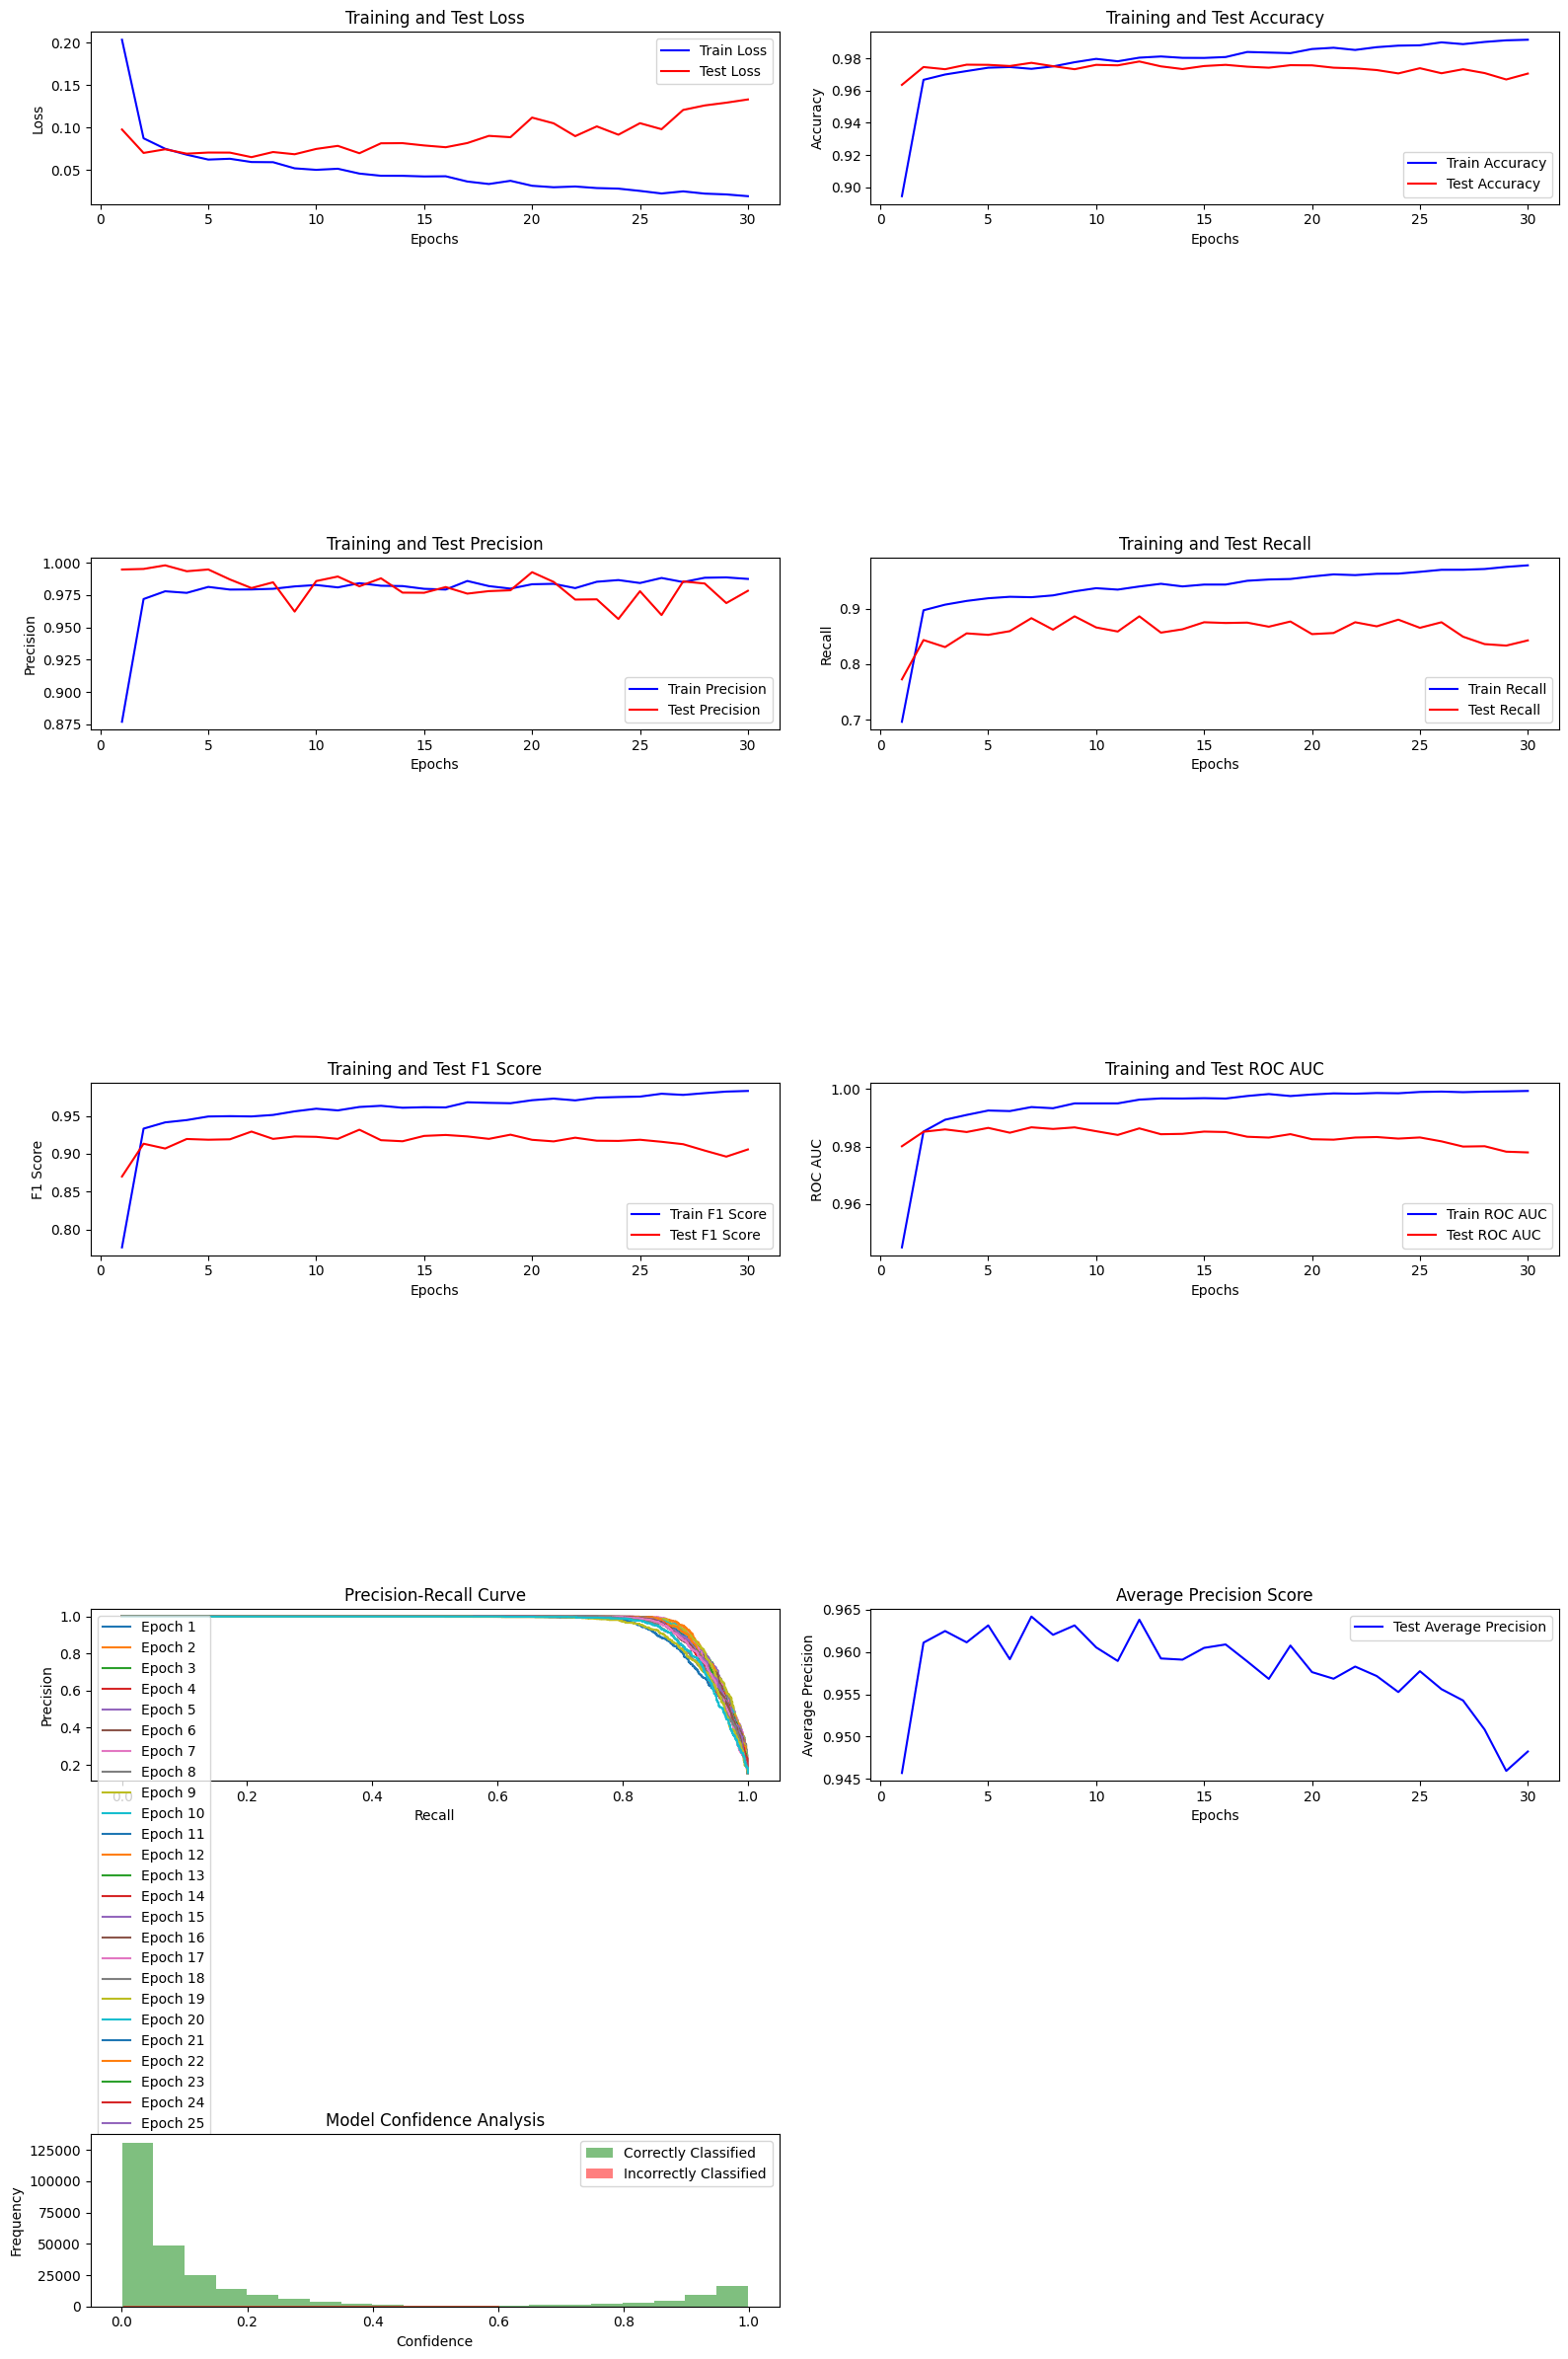

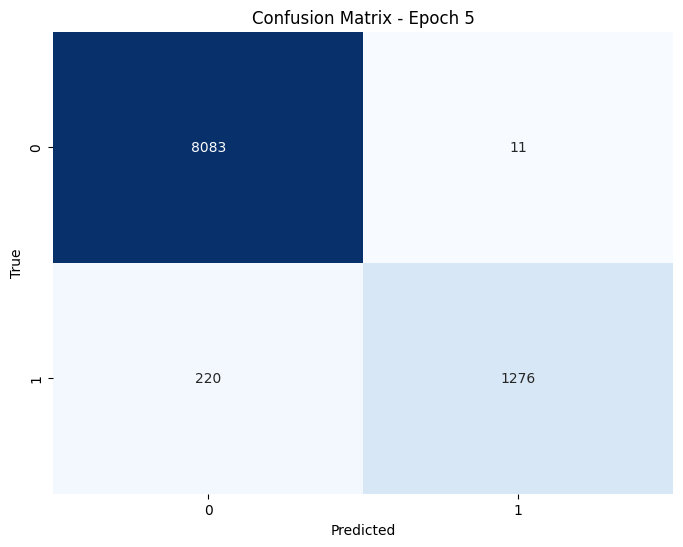

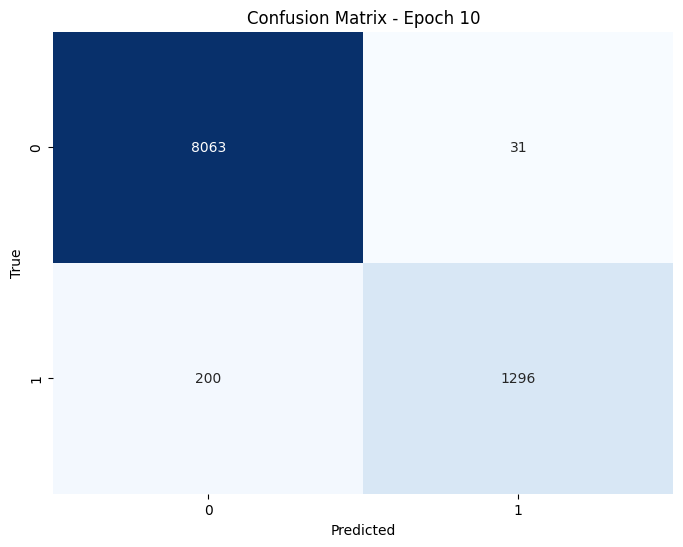

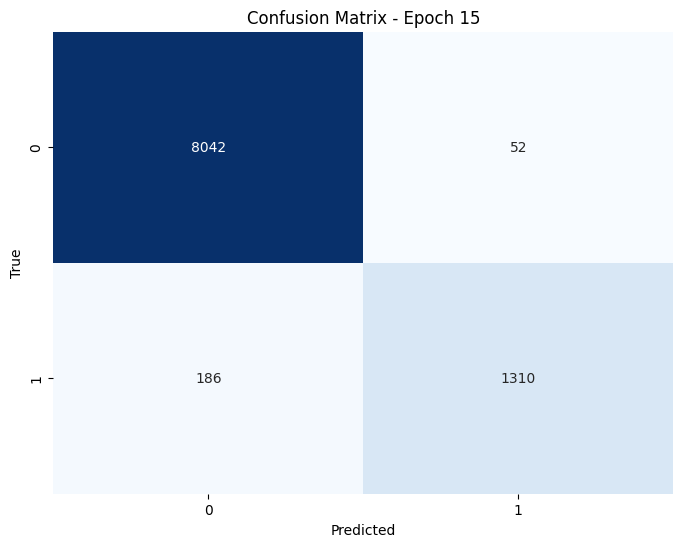

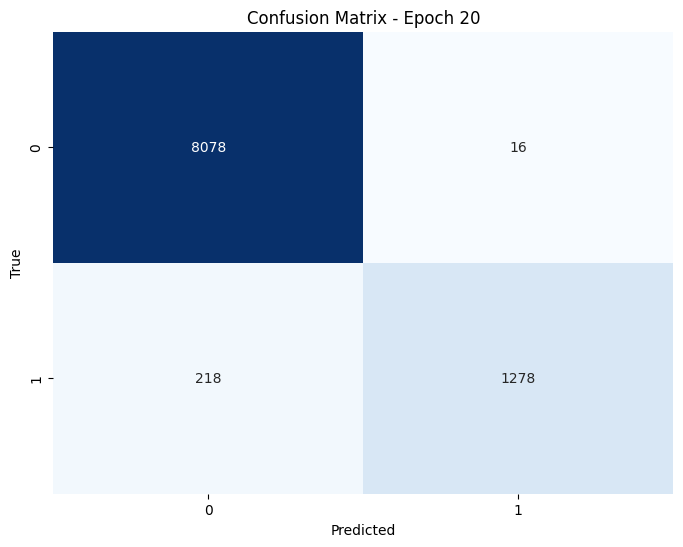

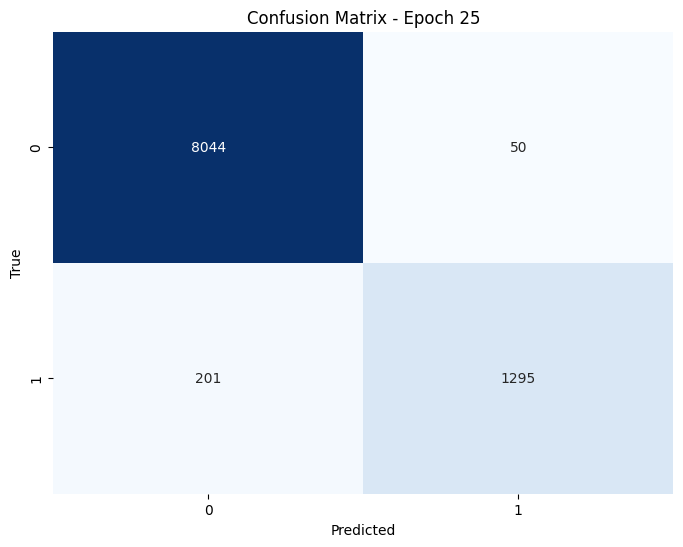

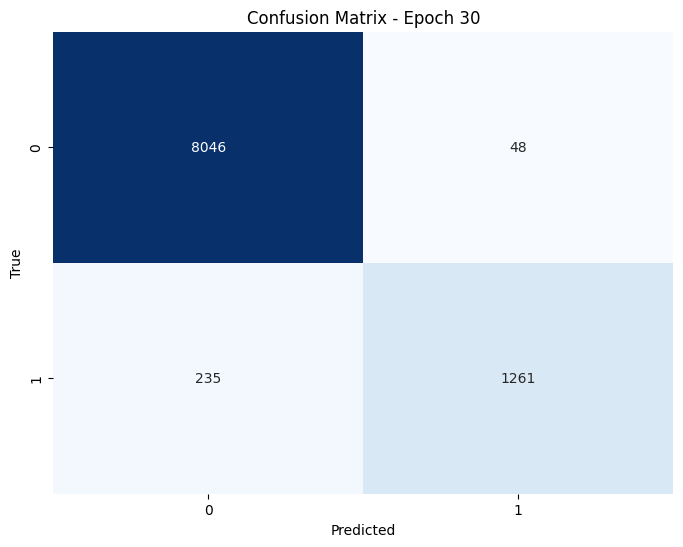

In [30]:
def plot_combined_metrics(H_pass1, H_pass2):
    # Combine metrics from Pass 1 and Pass 2
    combined_H = {}
    for key in H_pass1:
        combined_H[key] = H_pass1[key] + H_pass2[key]  # Concatenate metrics for Pass 1 and Pass 2
    
    # Number of epochs for combined training
    epochs = range(1, len(combined_H["train_loss"]) + 1)

    plt.figure(figsize=(16, 24))

    # Plot Training and Test Loss
    plt.subplot(5, 2, 1)
    plt.plot(epochs, combined_H["train_loss"], 'b', label='Train Loss')
    plt.plot(epochs, combined_H["test_loss"], 'r', label='Test Loss')
    plt.title('Training and Test Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Training and Test Accuracy
    plt.subplot(5, 2, 2)
    plt.plot(epochs, combined_H["train_acc"], 'b', label='Train Accuracy')
    plt.plot(epochs, combined_H["test_acc"], 'r', label='Test Accuracy')
    plt.title('Training and Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot Training and Test Precision
    plt.subplot(5, 2, 3)
    plt.plot(epochs, combined_H["train_precision"], 'b', label='Train Precision')
    plt.plot(epochs, combined_H["test_precision"], 'r', label='Test Precision')
    plt.title('Training and Test Precision')
    plt.xlabel('Epochs')
    plt.ylabel('Precision')
    plt.legend()

    # Plot Training and Test Recall
    plt.subplot(5, 2, 4)
    plt.plot(epochs, combined_H["train_recall"], 'b', label='Train Recall')
    plt.plot(epochs, combined_H["test_recall"], 'r', label='Test Recall')
    plt.title('Training and Test Recall')
    plt.xlabel('Epochs')
    plt.ylabel('Recall')
    plt.legend()

    # Plot Training and Test F1 Score
    plt.subplot(5, 2, 5)
    plt.plot(epochs, combined_H["train_f1"], 'b', label='Train F1 Score')
    plt.plot(epochs, combined_H["test_f1"], 'r', label='Test F1 Score')
    plt.title('Training and Test F1 Score')
    plt.xlabel('Epochs')
    plt.ylabel('F1 Score')
    plt.legend()

    # Plot Training and Test ROC AUC
    plt.subplot(5, 2, 6)
    plt.plot(epochs, combined_H["train_roc_auc"], 'b', label='Train ROC AUC')
    plt.plot(epochs, combined_H["test_roc_auc"], 'r', label='Test ROC AUC')
    plt.title('Training and Test ROC AUC')
    plt.xlabel('Epochs')
    plt.ylabel('ROC AUC')
    plt.legend()

    # Plot Precision-Recall Curve for each epoch (from Pass 1 and Pass 2)
    plt.subplot(5, 2, 7)
    for i, (precision, recall) in enumerate(combined_H["test_precision_recall_curve"]):
        plt.plot(recall, precision, label=f'Epoch {i+1}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend()

    # Plot Average Precision Score
    plt.subplot(5, 2, 8)
    plt.plot(epochs, combined_H["test_average_precision"], 'b', label='Test Average Precision')
    plt.title('Average Precision Score')
    plt.xlabel('Epochs')
    plt.ylabel('Average Precision')
    plt.legend()
    
    # Confidence Analysis Visualization
    plt.subplot(5, 2, 9)
    plt.hist(combined_H["correct_confidences"], bins=20, alpha=0.5, label='Correctly Classified', color='g')
    plt.hist(combined_H["incorrect_confidences"], bins=20, alpha=0.5, label='Incorrectly Classified', color='r')
    plt.xlabel('Confidence')
    plt.ylabel('Frequency')
    plt.title('Model Confidence Analysis')
    plt.legend()

    plt.tight_layout()
    plt.show()

    # Plot Confusion Matrices every 5 epochs
    for i, cm in enumerate(combined_H["confusion_matrices"]):
        if (i + 1) % 5 == 0:  # Plot every 5 epochs
            plt.figure(figsize=(8, 6))
            sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
            plt.title(f'Confusion Matrix - Epoch {i+1}')
            plt.xlabel('Predicted')
            plt.ylabel('True')
            plt.show()

# Function call to plot the combined metrics
plot_combined_metrics(H_pass1, H_pass2)


In [31]:
 # Save the plot to the specified path
plot_filename = os.path.join(MODEL_PATH, "training_metrics_plot.png")

# Use a higher DPI for better quality
plt.savefig(plot_filename, format='png', dpi=300)  # Save the plot with higher DPI for clarity
print(f"Plot saved to {plot_filename}")
    
plt.close()  # Ensure the plot is cleared after saving to avoid showing it blank


Plot saved to /home/hifis/hifis0010/Thesis_Hafeez/Thesis_Code/Enhanced-Skin-Lesion-detection-using-Deep-Learning-model/results/output/training_metrics_plot.png


# interactive visual comparison for predictions


In [1]:
import pandas as pd
import torch
import random
import matplotlib.pyplot as plt
from torchvision import transforms

# Load the test CSV to get metadata information (only used for loading purposes, not during visualization)
def load_metadata(csv_path):
    return pd.read_csv(csv_path)

# Define Function for Interactive Visual Comparison of 20 Random Images
def interactive_visual_comparison(model, test_loader, device):
    model.eval()
    all_images = []
    all_targets = []
    all_preds = []
    transform_back = transforms.ToPILImage()

    with torch.no_grad():
        for images, metadata, targets in test_loader:  # Removed 'image_names' from the DataLoader
            images, metadata = images.to(device), metadata.to(device)
            targets = targets.to(device)
            
            # Make predictions
            outputs = model(images, metadata)
            preds = torch.sigmoid(outputs).round()  # Convert logits to binary predictions (0 or 1)
            
            # Store images, targets, and predictions
            all_images.extend(images.cpu().detach())
            all_targets.extend(targets.cpu().detach().numpy())
            all_preds.extend(preds.cpu().detach().numpy())
    
    # Randomly select 20 samples
    indices = random.sample(range(len(all_images)), 10)
    
    plt.figure(figsize=(20, 40))
    for i, idx in enumerate(indices):
        original_label = "malignant" if all_targets[idx] == 1 else "benign"
        predicted_label = "malignant" if all_preds[idx] == 1 else "benign"

        # Convert image tensor back to PIL image
        img = transform_back(all_images[idx])
        
        # Plot the image and prediction details
        plt.subplot(10, 2, i + 1)  # Corrected the subplot number
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Original: {original_label}\nPredicted: {predicted_label}")
        
    plt.tight_layout()
    plt.show()



# lesion predictions


In [ ]:
TEST_CSV_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'split_csv', 'test_split.csv')
test_metadata_df = LesionPredictions.load_metadata(TEST_CSV_PATH)

# Make sure to define 'model', 'test_loader', and 'DEVICE'
visualizer = LesionPredictions(model, test_loader, DEVICE)
visualizer.inference_prediction()

# GUI tool


In [ ]:
import os
import torch
import pandas as pd
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import Image, ImageTk
import torchvision.transforms as transforms
from tkinter import ttk
import torch.nn as nn
import torchvision.models as models

# Define the paths
BASE_DIR = "/Users/hafeez/Desktop"
IMAGE_DIR = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'Train_JPEG', 'JPEG')
preprocess_CSV_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Dataset', 'Train_JPEG', 'ISIC_2020_Training_GroundTruth_preprocess.csv')
MODEL_PATH = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Thesis_Code', 'Enhanced-Skin-Lesion-detection-using-Deep-Learning-model', 'results', 'output', 'melanoma_trained_model.pth')

# Load the trained model
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
try:
    model = models.resnet50(pretrained=True)
    num_ftrs = model.fc.in_features
    model.fc = nn.Linear(num_ftrs, 1)  # Assuming binary classification
    model.load_state_dict(torch.load(MODEL_PATH, map_location=DEVICE))
    model = model.to(DEVICE)
    model.eval()
except Exception as e:
    print(f"Error loading model: {e}")
    exit()

# Load CSV metadata
try:
    ground_truth_df = pd.read_csv(preprocess_CSV_PATH)
except FileNotFoundError:
    print(f"Error: Ground truth CSV file not found at {preprocess_CSV_PATH}")
    exit()

# Define the transform for input images
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Define function to predict the selected image with metadata
def predict_image(image_path, metadata):
    try:
        # Load and transform the image
        image = Image.open(image_path).convert('RGB')
        input_tensor = transform(image).unsqueeze(0).to(DEVICE)
        
        # Perform prediction
        with torch.no_grad():
            output = model(input_tensor).squeeze()
            probability = torch.sigmoid(output).item()
            prediction = 'malignant' if probability > 0.5 else 'benign'
            return prediction, probability
    except Exception as e:
        messagebox.showerror("Prediction Error", f"Error predicting image: {e}")
        return 'Error', 0.0

# Define function to get ground truth from CSV
def get_ground_truth(image_name):
    try:
        ground_truth_row = ground_truth_df[ground_truth_df['image_name'] == image_name]
        if not ground_truth_row.empty:
            # Get the metadata
            sex = ground_truth_row.iloc[0]['sex']
            age = ground_truth_row.iloc[0]['age_approx']
            site = ground_truth_row.iloc[0]['anatom_site_general_challenge']
            return ground_truth_row.iloc[0]['benign_malignant'], sex, age, site
        else:
            return 'Unknown', None, None, None
    except Exception as e:
        messagebox.showerror("CSV Error", f"Error accessing ground truth data: {e}")
        return 'Error', None, None, None

# GUI for image selection and prediction
def select_image():
    # Ask user to select an image
    file_path = filedialog.askopenfilename(initialdir=IMAGE_DIR, title="Select an Image",
                                           filetypes=[("All files", "*.*")])  # Allow selection of files without extensions
    if file_path:
        try:
            # Display the selected image
            img = Image.open(file_path).convert('RGB')
            img.thumbnail((300, 300))
            img = ImageTk.PhotoImage(img)
            panel.configure(image=img)
            panel.image = img

            # Get the image name (without extension)
            image_name = os.path.basename(file_path)

            # Make prediction
            prediction, probability = predict_image(file_path, None)

            # Get ground truth
            ground_truth, sex, age, site = get_ground_truth(image_name)

            # Update the result label
            if prediction == 'Error' or ground_truth == 'Error':
                result_text = "An error occurred. Please try again."
            else:
                prediction_text = f"Prediction: {prediction.capitalize()} ({probability:.2f})"
                ground_truth_text = f"\nGround Truth: {ground_truth.capitalize()}"
                metadata_text = f"\nMetadata: Sex: {sex}, Age: {age}, Site: {site}"
                result_text = f"{prediction_text}\n{ground_truth_text}\n{metadata_text}"
            result_label.config(text=result_text, justify='center', font=('Helvetica', 18), foreground='#003366')
        except Exception as e:
            messagebox.showerror("Image Error", f"Error processing image: {e}")

# Set up the GUI
root = tk.Tk()
root.title("Skin Lesion Classification Tool")
root.geometry("800x900")
root.configure(bg='#e6f2ff')

# Style configuration
style = ttk.Style()
style.theme_use('clam')
style.configure('TButton', font=('Helvetica', 14), background='#007BFF', foreground='white', padding=10)
style.map('TButton', background=[('active', '#0056b3')])
style.configure('TLabel', font=('Helvetica', 16), background='#e6f2ff', foreground='#333333')

# Title label
title_label = ttk.Label(root, text="Skin Lesion Classification Tool", font=('Helvetica', 20, 'bold'), background='#e6f2ff')
title_label.pack(pady=20)

# Image display panel
panel = tk.Label(root, bg='#e6f2ff', borderwidth=2, relief="groove")
panel.pack(pady=20)

# Button to select image
btn = ttk.Button(root, text="Select Image", command=select_image)
btn.pack(pady=10)

# Label to display prediction and ground truth
result_label = ttk.Label(root, text="", wraplength=500)
result_label.pack(pady=20)

# Add university logo
try:
    logo_path = os.path.join(BASE_DIR, 'Thesis_Hafeez', 'Thesis_Code', 'Enhanced-Skin-Lesion-detection-using-Deep-Learning-model', 'results', 'uds.jpg')
    logo_image = Image.open(logo_path).resize((220, 150), Image.LANCZOS)  # Use LANCZOS for resizing
    logo_photo = ImageTk.PhotoImage(logo_image)
    logo_label = tk.Label(root, image=logo_photo, bg='#e6f2ff')
    logo_label.image = logo_photo
    logo_label.pack(side='bottom', pady=20)
except FileNotFoundError:
    print("University logo not found. Skipping logo display.")

# Run the GUI
root.mainloop()


/Users/hafeez/opt/anaconda3/envs/env/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/hafeez/opt/anaconda3/envs/env/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Error loading model: Error(s) in loading state_dict for ResNet:
	Missing key(s) in state_dict: "conv1.weight", "bn1.weight", "bn1.bias", "bn1.running_mean", "bn1.running_var", "layer1.0.conv1.weight", "layer1.0.bn1.weight", "layer1.0.bn1.bias", "layer1.0.bn1.running_mean", "layer1.0.bn1.running_var", "layer1.0.conv2.weight", "layer1.0.bn2.weight", "layer1.0.bn2.bias", "layer1.0.bn2.running_mean", "layer1.0.bn2.running_var", "layer1.0.conv3.weight", "layer1.0.bn3.weight", "layer1.0.bn3.bias", "layer1.0.bn3.running_mean", "layer1.0.bn3.running_var", "layer1.0.downsample.0.weight", "layer1.0.downsample.1.weight", "layer1.0.downsample.1.bias", "layer1.0.downsample.1.running_mean", "layer1.0.downsample.1.running_var", "layer1.1.conv1.weight", "layer1.1.bn1.weight", "layer1.1.bn1.bias", "layer1.1.bn1.running_mean", "layer1.1.bn1.running_var", "layer1.1.conv2.weight", "layer1.1.bn2.weight", "layer1.1.bn2.bias", "layer1.1.bn2.running_mean", "layer1.1.bn2.running_var", "layer1.1.conv3.weight", 

: 